# Food demand on Nigeria
Population of interest: young population  
Possibly compare between social class

In [1]:
!pip install -r requirements.txt

In [2]:
!pip install python-dateutil

In [5]:
#load dataset
import numpy as np
import pandas as pd

consumption_ownprod = pd.read_excel('Nigeria LSMS Consumption from Own Production.xlsx')
consumption = pd.read_excel('Nigeria LSMS Consumption.xlsx')
expenditures = pd.read_excel('Nigeria LSMS.xlsx',sheet_name='Expenditures')
hh_characteristics = pd.read_excel('Nigeria LSMS.xlsx',sheet_name='HH Characteristics')
fct = pd.read_excel('WAFCT_2019.xlsx', sheet_name='05 NV_sum_57 (per 100g EP)')

## Estimation Example

### Data

In [6]:
#household characteristics
hh_characteristics.columns.name = 'k'
hh_characteristics.set_index(['i','t','m'],inplace=True)

#expenditure
expenditures.columns.name = 'j'

expenditures = expenditures.groupby('j',axis=1).sum()
expenditures = expenditures.replace(0,np.nan)
expenditures1 = np.log(expenditures.set_index(['i','t','m']))

#consumption
if 'm' not in consumption.columns:
    consumption['m'] = 1

consumption = consumption.set_index(['i','t','m','u'])
consumption.columns.name = 'k'

consumption = consumption.apply(lambda x: pd.to_numeric(x,errors='coerce'))
consumption = consumption.replace(0,np.nan)

In [7]:
fct.index.name = 'i'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [8]:
consumption

k                                          (Cocoyam, Spinach, etc)  \
i        t      m       u                                            
10001.0  2010.0 Nigeria Kilograms                              NaN   
                        Litres                                 NaN   
10002.0  2010.0 Nigeria Kilograms                              NaN   
                        Litres                                 NaN   
10003.0  2010.0 Nigeria Kilograms                              NaN   
...                                                            ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                          NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      NaN   
NaN      NaN    Nigeria NaN                                    NaN   
                        NaN                                    NaN   

k                                          Agricultural eggs  Animal fat  \
i        t      m       u                                                  
10001.0  2010.0 Nigeria Kilograms                       0.89         NaN   
                        Litres                           NaN         NaN   
10002.0  2010.0 Nigeria Kilograms                       0.89         NaN   
                        Litres                           NaN         NaN   
10003.0  2010.0 Nigeria Kilograms                       0.44         NaN   
...                                                      ...         ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                    NaN         NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                NaN         NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                NaN         NaN   
NaN      NaN    Nigeria NaN                              NaN         NaN   
                        NaN                              NaN         NaN   

k                                          Apples  Avocado pear  \
i        t      m       u                                         
10001.0  2010.0 Nigeria Kilograms             NaN           NaN   
                        Litres                NaN           NaN   
10002.0  2010.0 Nigeria Kilograms             NaN           NaN   
                        Litres                NaN           NaN   
10003.0  2010.0 Nigeria Kilograms             NaN           NaN   
...                                           ...           ...   
379151.0 2018.0 Nigeria 3. LITRES (L)         NaN           NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)     NaN           NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)     NaN           NaN   
NaN      NaN    Nigeria NaN                   NaN           NaN   
                        NaN                   NaN           NaN   

k                                          Baby milk powder  Bananas  Beef  \
i        t      m       u                                                    
10001.0  2010.0 Nigeria Kilograms                       NaN     1.30   1.0   
                        Litres                          NaN      NaN   NaN   
10002.0  2010.0 Nigeria Kilograms                       NaN     1.30   2.0   
                        Litres                          NaN      NaN   NaN   
10003.0  2010.0 Nigeria Kilograms                       NaN     0.35   0.3   
...                                                     ...      ...   ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                   NaN      NaN   NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)               NaN      NaN   1.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)               NaN      NaN   1.0   
NaN      NaN    Nigeria NaN                             NaN      NaN   NaN   
                        NaN                             NaN      NaN   NaN   

k                                          Beer (local and imported)  \
i        t      m       u                                              
10001.0  2010.0 Nigeria Kilograms                                NaN 

In [9]:
hh_characteristics

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,t,m,,,,,,,,,,,,,,
10001,2010,Nigeria,0,0,0,0,1,2,0,1,0,0,0,1,2,0
10002,2010,Nigeria,0,0,1,1,1,1,0,0,0,0,0,2,1,0
10003,2010,Nigeria,0,1,1,1,0,0,1,0,0,1,0,0,1,0
10004,2010,Nigeria,0,0,1,0,0,0,1,0,0,0,0,0,0,1
10006,2010,Nigeria,0,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,0,0,0,0,1,1,1,0,0,0,0,0,0,1
379148,2018,Nigeria,0,0,0,0,1,0,0,0,0,0,0,0,0,0
379151,2018,Nigeria,0,0,2,0,0,0,1,0,0,0,1,0,1,0


In [10]:
expenditures1

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,Beef,Beer (local and imported),Biscuits,...,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.298317,6.214608,6.291569,NaN,...,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,NaN,NaN,7.313220
10002,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.192957,7.090077,7.600902,NaN,...,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,NaN,NaN,7.090077
10003,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10004,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10006,2010,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,5.703782,5.703782,NaN,NaN,...,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,NaN,NaN,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,NaN,7.003065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,7.495542
379148,2018,Nigeria,4.605170,NaN,NaN,NaN,NaN,NaN,NaN,6.551080,NaN,NaN,...,NaN,NaN,4.094345,5.298317,5.010635,NaN,NaN,NaN,NaN,7.377759
379151,2018,Nigeria,NaN,6.802395,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,...,NaN,NaN,5.010635,6.396930,6.396930,6.620073,7.377759,NaN,NaN,8.160518


y = expenditures1  
d = hh_characteristics

#### Drop food that few people consume

In [11]:
from cfe.estimation import drop_columns_wo_covariance

expenditures1 = drop_columns_wo_covariance(expenditures1,min_obs=30)

Missing dependencies for OracleDemands.


In [12]:
use = expenditures1.index.intersection(hh_characteristics.index)
expenditures1 = expenditures1.loc[use,:]
hh_characteristics = hh_characteristics.loc[use,:]

In [13]:
expenditures1 #drop half

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Biscuits,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,...,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,5.298317,6.214608,NaN,6.620073,NaN,NaN,7.244228,6.309918,...,5.010635,5.298317,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,7.313220
10002,2010,Nigeria,NaN,5.634790,5.192957,7.090077,NaN,6.109248,NaN,NaN,7.649693,5.857933,...,6.802395,5.298317,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,7.090077
10003,2010,Nigeria,NaN,5.192957,4.605170,6.214608,NaN,5.298317,NaN,NaN,NaN,NaN,...,NaN,3.401197,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,5.991465
10004,2010,Nigeria,NaN,5.192957,4.605170,6.214608,NaN,4.787492,NaN,NaN,NaN,NaN,...,NaN,3.688879,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,5.991465
10006,2010,Nigeria,NaN,NaN,5.703782,5.703782,NaN,5.010635,5.192957,NaN,NaN,NaN,...,NaN,2.302585,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,NaN,7.003065,NaN,NaN,NaN,6.684612,7.408531,5.703782,NaN,6.684612,...,7.600902,NaN,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,7.495542
379148,2018,Nigeria,4.605170,NaN,NaN,6.551080,NaN,5.521461,6.309918,NaN,NaN,6.109248,...,NaN,NaN,NaN,NaN,4.094345,5.298317,5.010635,NaN,NaN,7.377759
379151,2018,Nigeria,NaN,6.802395,6.214608,NaN,NaN,6.109248,NaN,NaN,8.006368,6.109248,...,NaN,4.605170,NaN,NaN,5.010635,6.396930,6.396930,6.620073,7.377759,8.160518


In [14]:
use = expenditures1.index.intersection(hh_characteristics.index)
expenditures1 = expenditures1.loc[use,:]
hh_characteristics = hh_characteristics.loc[use,:]

### Estimation

In [15]:
expenditures2 = expenditures1.stack()
hh_characteristics1 = hh_characteristics.stack()

assert expenditures2.index.names == ['i','t','m','j']
assert hh_characteristics1.index.names == ['i','t','m','k']

#### Basic Estimation

In [16]:
from cfe import Regression

result = Regression(y=expenditures2,d=hh_characteristics1)

In [17]:
result.predicted_expenditures()

i       t     m        j                      
10001   2010  Nigeria  (Cocoyam, Spinach, etc)     156.909249
                       Agricultural eggs           397.586147
                       Bananas                     265.637209
                       Beef                       1000.482019
                       Bread                       394.467437
                                                     ...     
379155  2018  Nigeria  Tomato puree(canned)        269.917715
                       Tomatoes                    308.927296
                       Wheat flour                 855.235718
                       White beans                 881.728278
                       Yam-roots                  1251.744786
Length: 708167, dtype: float64

<IPython.core.display.Javascript object>


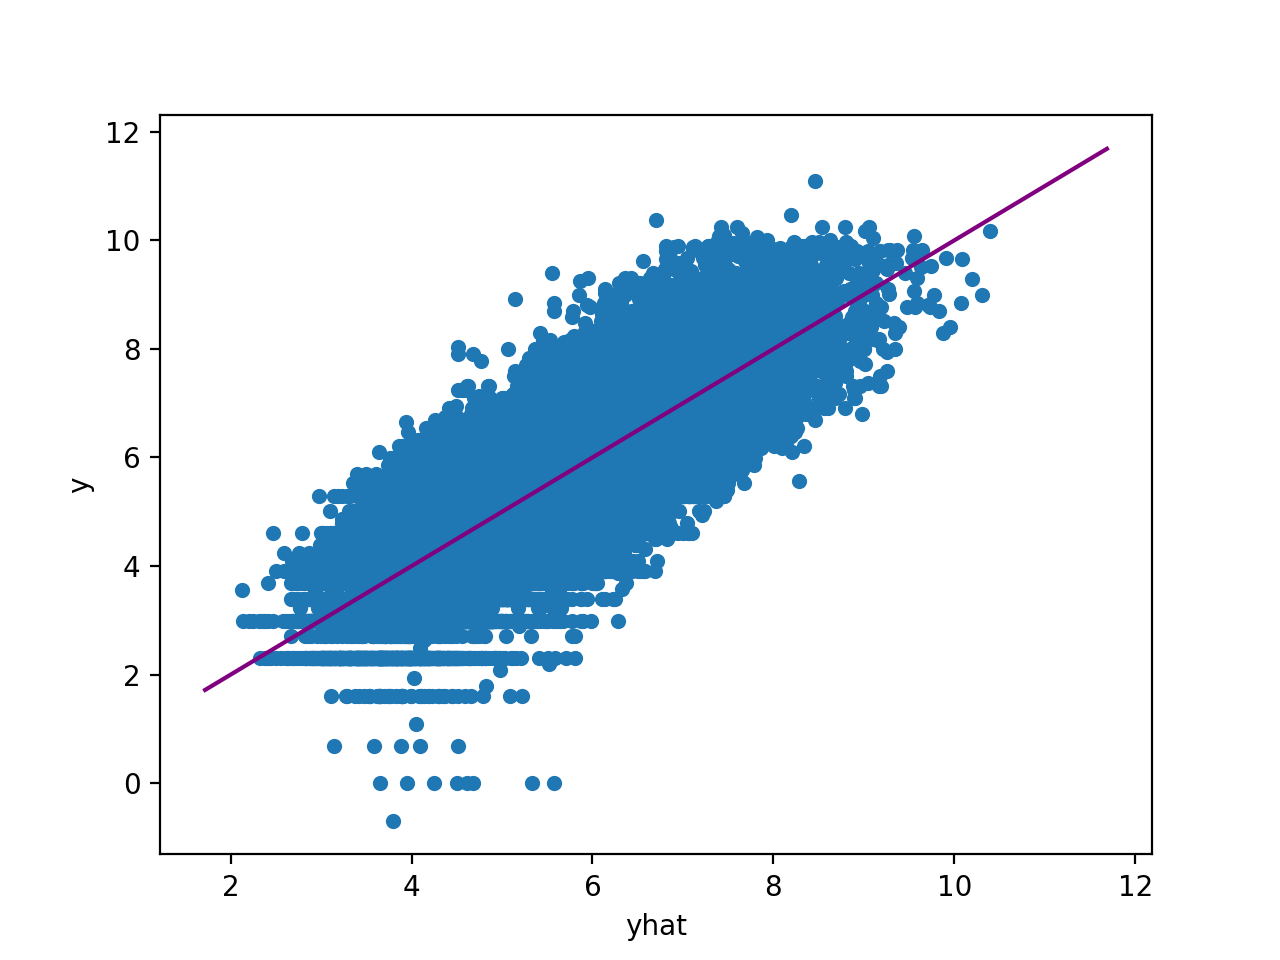

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
df = pd.DataFrame({'y':expenditures2,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax], color = 'purple')

#### Parameter

In [19]:
result.get_beta().sort_values()

j
Fish-Frozen                             0.246842
Other vegetables (fresh or canned)      0.253198
Garden eggs/egg plant                   0.257859
Okra-fresh                              0.295308
Pineapples                              0.295379
(Cocoyam, Spinach, etc)                 0.305324
Chicken                                 0.318017
Cassava flour                           0.321077
Goat                                    0.324849
Gari -Yellow                            0.326250
Milk tinned (unsweetened)               0.335286
Plantains                               0.336689
Okra-dried                              0.341528
Tomatoes                                0.341543
Beef                                    0.341884
Palm oil                                0.343210
Soft drinks (Coca cola, spirit etc)     0.343263
Yam-roots                               0.347992
Tomato puree(canned)                    0.352777
Orange/tangerine                        0.361425
Brown beans       

<IPython.core.display.Javascript object>


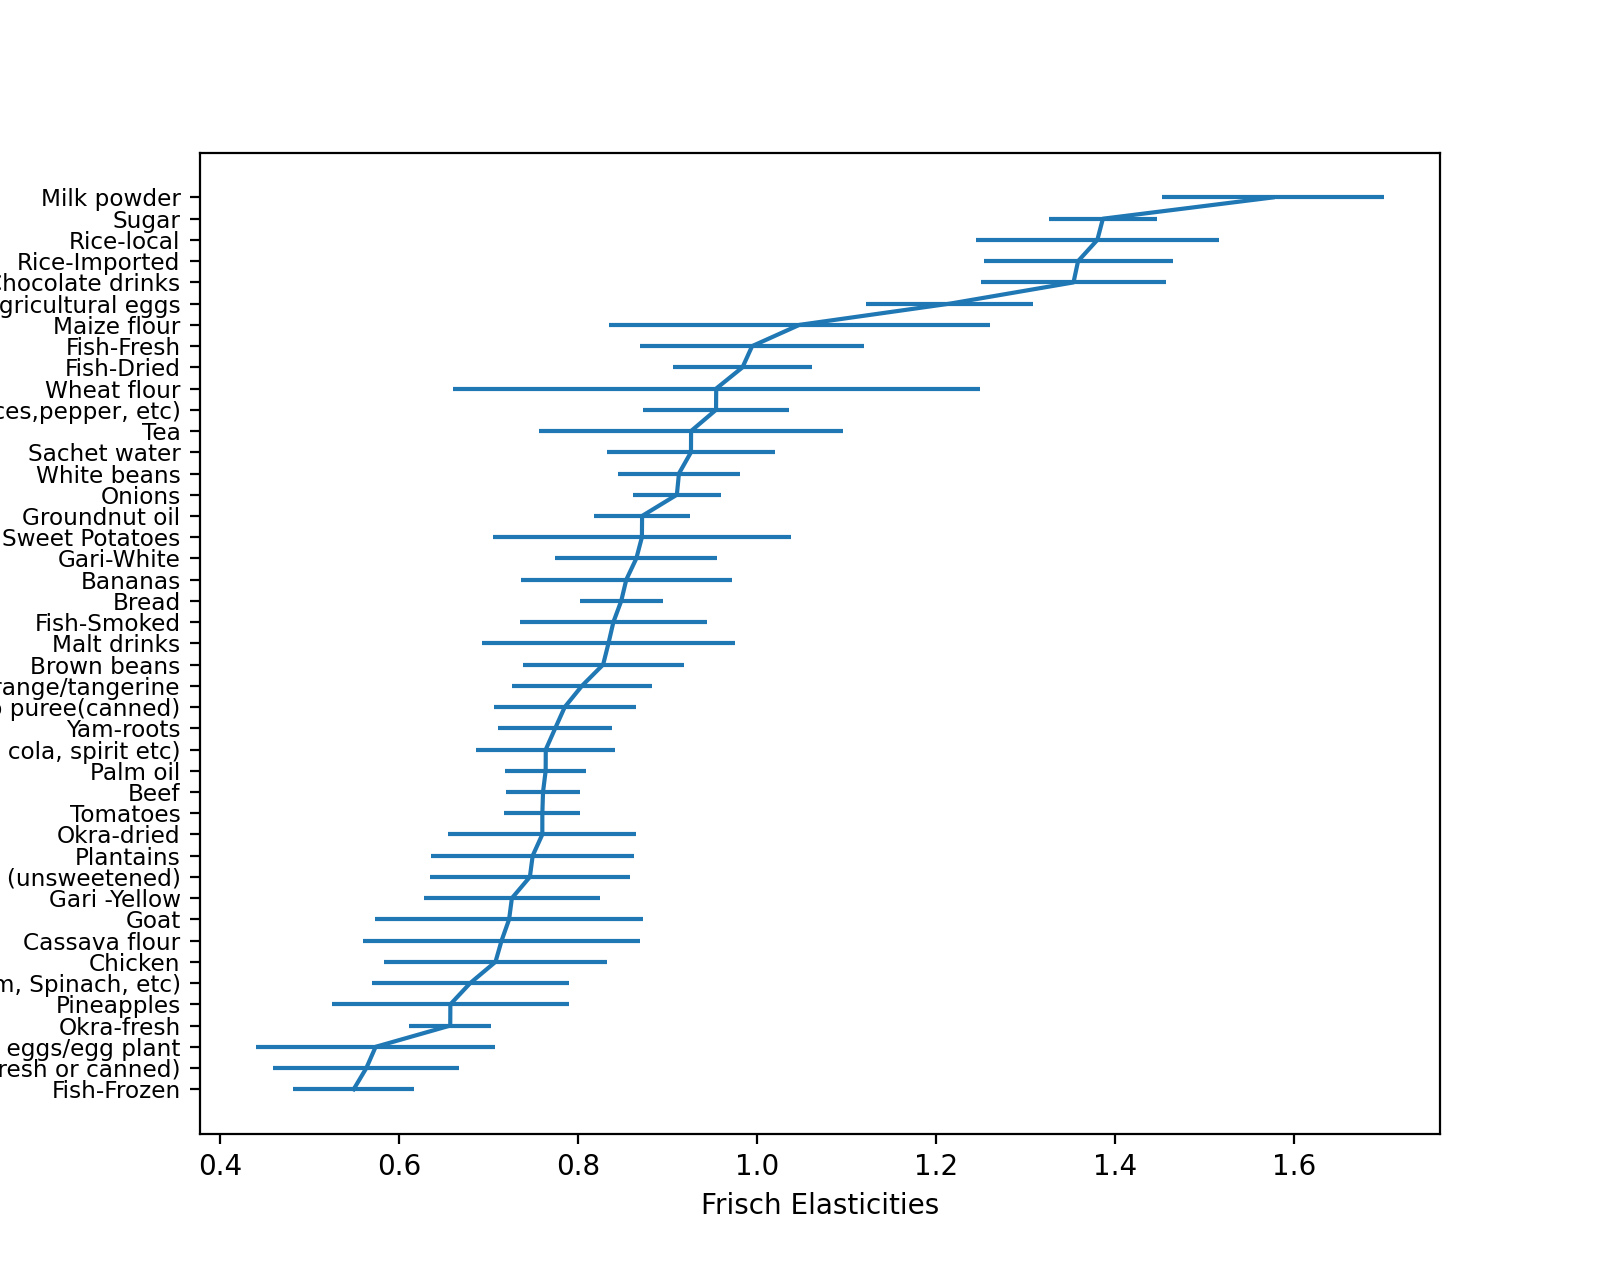

<IPython.core.display.Javascript object>


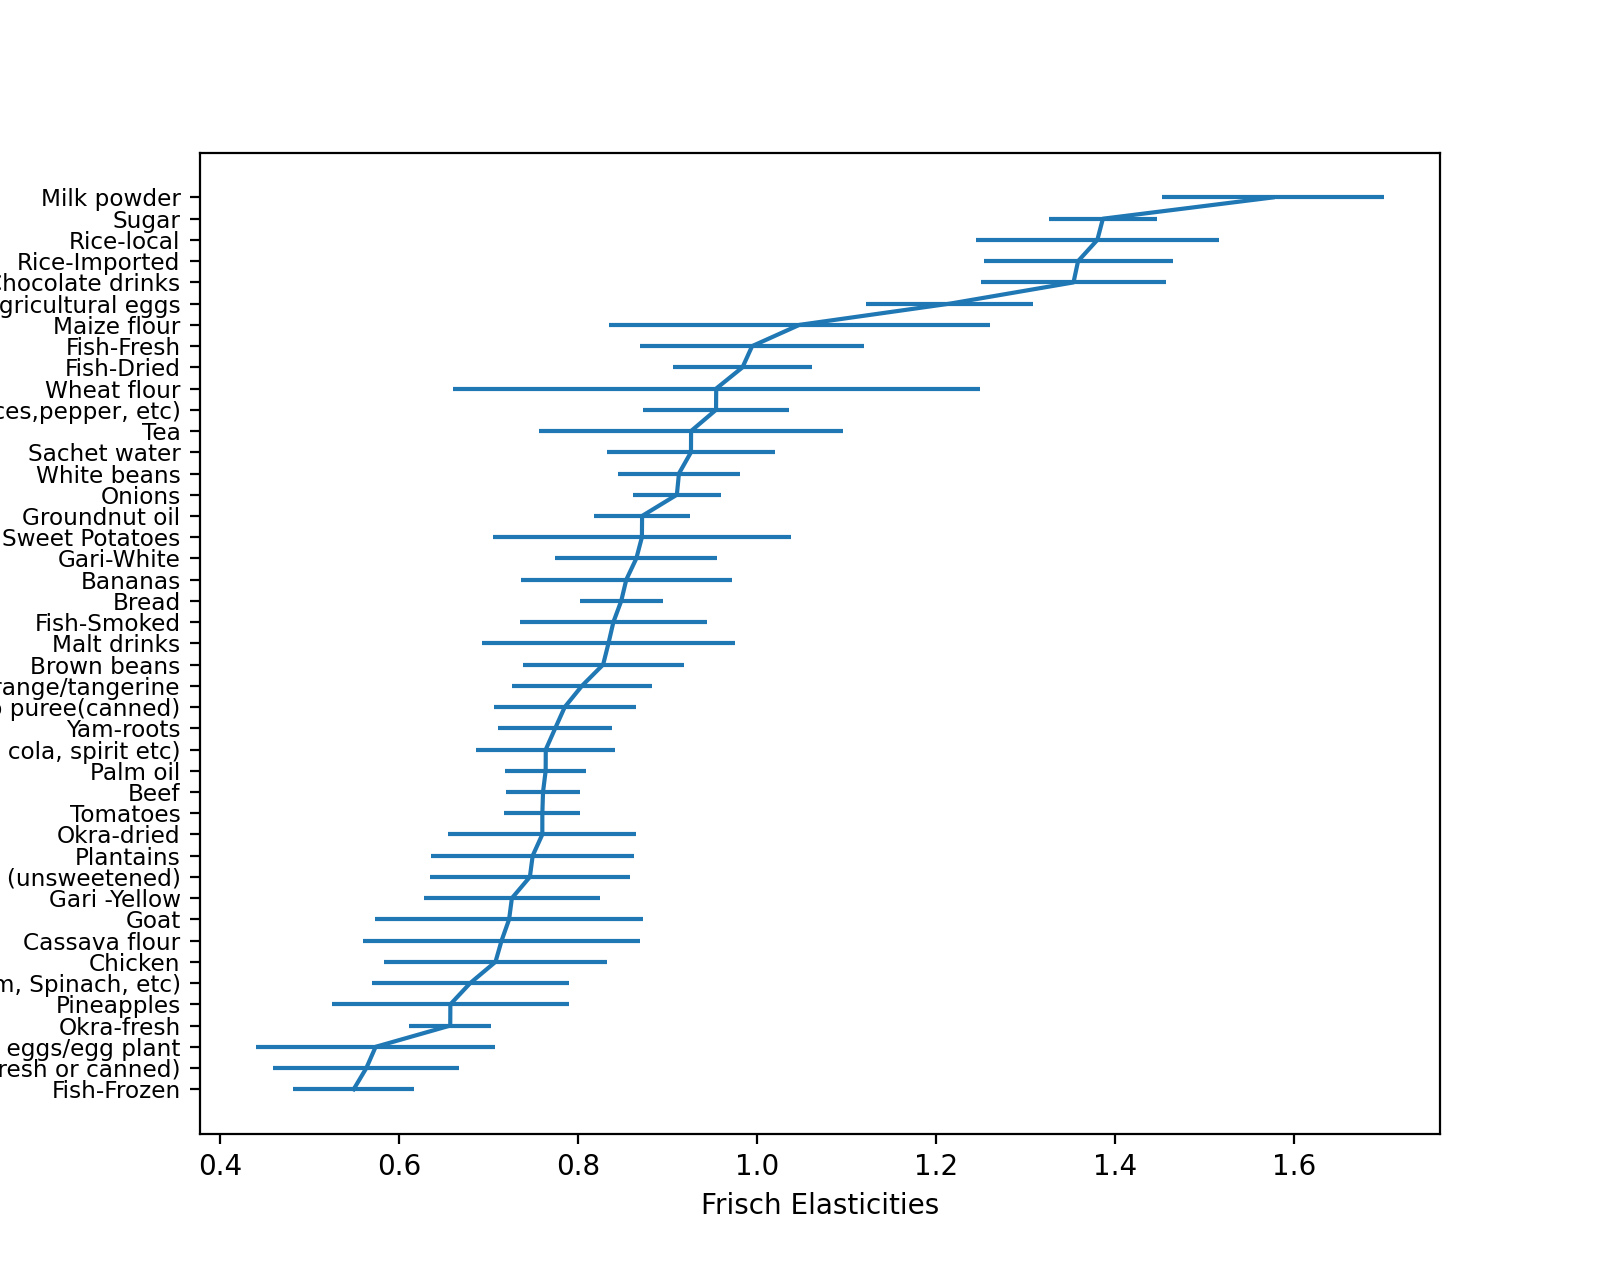

In [20]:
result.graph_beta()

#### Demand and Household Composition

In [21]:
result.gamma

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,Constant
j,,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.015192,0.012283,0.030412,-0.033765,0.048779,0.057815,0.101008,0.031863,0.028920,0.033931,0.048556,0.050374,0.070528,0.031611,-0.197808
Agricultural eggs,0.005273,0.047350,0.050232,0.015530,0.089903,0.219877,0.182996,0.053201,0.053745,0.019356,0.028243,0.094256,0.103635,-0.060144,-0.474118
Bananas,0.037509,0.019628,0.046346,0.056714,0.095653,0.124172,0.082554,0.023702,0.009165,0.050533,0.077732,0.056040,0.068480,-0.002241,-0.357297
Beef,0.035403,0.045631,0.032596,0.059631,0.084576,0.156356,0.147275,0.008473,0.033471,0.044356,0.055734,0.099305,0.059286,-0.004953,-0.434315
Bread,0.019121,0.050941,0.031611,0.056330,0.102693,0.172484,0.140703,0.016710,0.046773,0.063223,0.072251,0.102843,0.096053,0.017779,-0.442452
Brown beans,0.041103,0.073306,0.049682,0.065975,0.070143,0.130769,0.110357,0.041433,0.026002,0.061614,0.090390,0.073097,0.110112,0.060538,-0.388814
Cassava flour,0.003404,0.100233,0.033744,0.085940,0.066803,0.088818,0.074925,-0.067421,0.068931,-0.010453,0.085130,0.052734,0.093547,0.013511,-0.296914
Chicken,-0.007596,0.033497,-0.014040,0.032923,0.082972,0.133768,0.161904,-0.062432,0.011918,0.011559,0.042921,0.103479,0.126613,-0.005463,-0.526734
Chocolate drinks,0.067683,0.016802,0.045409,0.003374,0.071992,0.145705,0.183903,0.076143,0.037072,0.028193,0.077367,0.131429,0.080670,-0.002316,-0.368023


In [22]:
#Save result
result.to_pickle('my_estimates.pickle')

import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')